# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [4]:
f1 = lambda x: np.sign(x)*x + np.power(x, 2)
f2 = lambda x: np.sign(x)*x**2
f3 = lambda x: np.power(np.abs(np.sin(5*x)), 3)
f4 = lambda x: 1/(1 + x**2)
f4_2 = lambda x: 1/(1 + 25*x**2)
f4_3 = lambda x: 1/(1 + 100*x**2)
f5 = lambda x: np.sign(x)

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

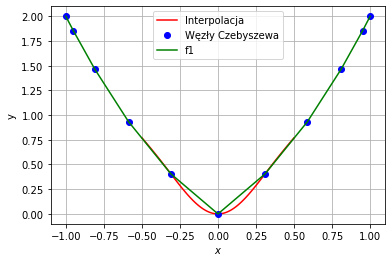

In [7]:
from scipy.interpolate import barycentric_interpolate

#Interpolacja przy użyciu metody barycentric_interpolate
X = np.linspace(-0.5, 0.5, 100)
n = 10
x_i = main.chebyshev_nodes(n)
y_i = f1(x_i)
w_i = main.bar_czeb_weights(n)

Y = barycentric_interpolate(x_i, y_i, X)

fig, ax = plt.subplots(1, 1)
ax.plot(X, Y, color = 'red', label = 'Interpolacja')
ax.plot(x_i, y_i, 'bo', label = 'Węzły Czebyszewa')
ax.plot(x_i, f1(x_i), color = 'green', label = 'f1')
ax.plot()
ax.set_xlabel('$x$'), ax.set_ylabel('y')
plt.legend(loc = 0)
plt.grid()
plt.show()


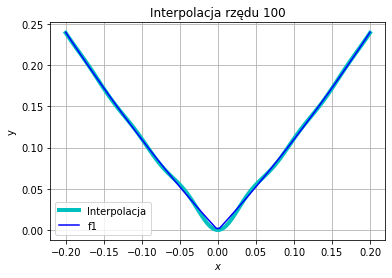

In [9]:
#Interpolacja przy użyciu barycentric_inte

X = np.linspace(-0.2, 0.2, 100)
n = 100
x_i = main.chebyshev_nodes(n)
y_i = f1(x_i)
w_i = main.bar_czeb_weights(n)

Y = main.barycentric_inte(x_i, y_i, w_i, X)

fig, ax = plt.subplots(1, 1)
ax.plot(X, Y, color = 'c', label = 'Interpolacja', linewidth=4)
ax.plot(X, f1(X), color = 'b', label = 'f1')
ax.plot()
ax.set_xlabel('$x$'), ax.set_ylabel('y')
plt.legend(loc = 0)
plt.title(f'Interpolacja rzędu {n}')
plt.grid()
plt.show()


norma = [main.L_inf(f1(X), Y)]

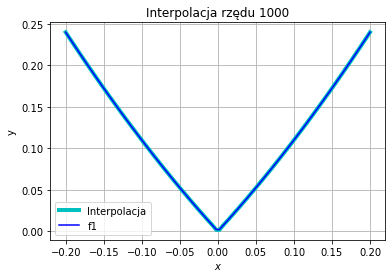

In [10]:
#Interpolacja dla 1000 węzłów
n = 1000
X = np.linspace(-0.2, 0.2, 100)
x_i = main.chebyshev_nodes(n)
y_i = f1(x_i)
w_i = main.bar_czeb_weights(n)

Y = main.barycentric_inte(x_i, y_i, w_i, X)

fig, ax = plt.subplots(1, 1)
ax.plot(X, Y, color = 'c', label = 'Interpolacja', linewidth=4)
ax.plot(X, f1(X), color = 'b', label = 'f1')
ax.plot()
ax.set_xlabel('$x$'), ax.set_ylabel('y')
plt.legend(loc = 0)
plt.title(f'Interpolacja rzędu {n}')
plt.grid()
plt.show()

norma.append(main.L_inf(f1(X), Y))

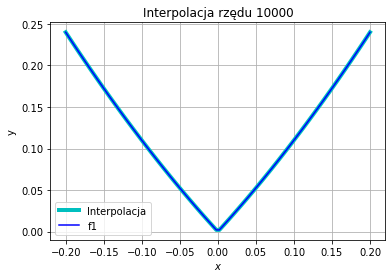

In [11]:
#Interpolacja dla 10000 węzłów
n = 10000
X = np.linspace(-0.2, 0.2, 100)
x_i = main.chebyshev_nodes(n)
y_i = f1(x_i)
w_i = main.bar_czeb_weights(n)

Y = main.barycentric_inte(x_i, y_i, w_i, X)

fig, ax = plt.subplots(1, 1)
ax.plot(X, Y, color = 'c', label = 'Interpolacja', linewidth=4)
ax.plot(X, f1(X), color = 'b', label = 'f1')
ax.plot()
ax.set_xlabel('$x$'), ax.set_ylabel('y')
plt.legend(loc = 0)
plt.title(f'Interpolacja rzędu {n}')
plt.grid()
plt.show()

norma.append(main.L_inf(f1(X), Y))

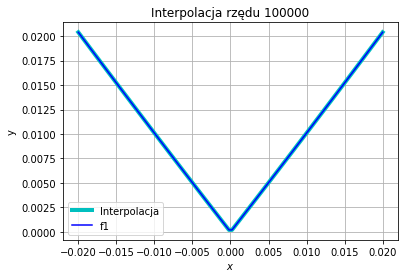

In [12]:
#Interpolacja dla 100000 węzłów
n = 100000
X = np.linspace(-0.02, 0.02, 100)
x_i = main.chebyshev_nodes(n)
y_i = f1(x_i)
w_i = main.bar_czeb_weights(n)

Y = main.barycentric_inte(x_i, y_i, w_i, X)

fig, ax = plt.subplots(1, 1)
ax.plot(X, Y, color = 'c', label = 'Interpolacja', linewidth=4)
ax.plot(X, f1(X), color = 'b', label = 'f1')
ax.plot()
ax.set_xlabel('$x$'), ax.set_ylabel('y')
plt.legend(loc = 0)
plt.title(f'Interpolacja rzędu {n}')
plt.grid()
plt.show()

norma.append(main.L_inf(f1(X), Y))

In [26]:
#Czas obliczeń

size1 = [10, 100, 1000, 10**4, 10**5] 
X = np.linspace(-0.02, 0.02, 100)

print('Czas obliczeń według funkcji #barycentric_inte# ')
for i in size1:
    x_i = main.chebyshev_nodes(i)
    y_i = f1(x_i)
    w_i = main.bar_czeb_weights(i)
    print(f'Rząd: {i} -> czas obliczeń wynosi:')
    saved_timing = %timeit -r 5 -n 10 -o main.barycentric_inte(x_i, y_i, w_i, X)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
        

Czas obliczeń według funkcji #barycentric_inte# 
Rząd: 10 -> czas obliczeń wynosi:
708 µs ± 105 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Rząd: 100 -> czas obliczeń wynosi:
1.73 ms ± 129 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Rząd: 1000 -> czas obliczeń wynosi:
11.8 ms ± 546 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Rząd: 10000 -> czas obliczeń wynosi:
117 ms ± 3.58 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Rząd: 100000 -> czas obliczeń wynosi:
1.18 s ± 26.2 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)



***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

In [25]:
for i in range(len(norma)):
    lst1 = [100, 1000, 10**4, 10**5]
    print(f'Dla N = {lst1[i]}, norma L_inf wynosi: {norma[i]}')


Dla N = 100, norma L_inf wynosi: 0.005905520950501668
Dla N = 1000, norma L_inf wynosi: 0.00045387320155362084
Dla N = 10000, norma L_inf wynosi: 7.50312377085019e-06
Dla N = 100000, norma L_inf wynosi: 7.503116225066801e-07


In [ ]:
#Zgodnie z przypuszczeniami im wyższy rząd interpolacji tym lepsza dokładność. 

***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

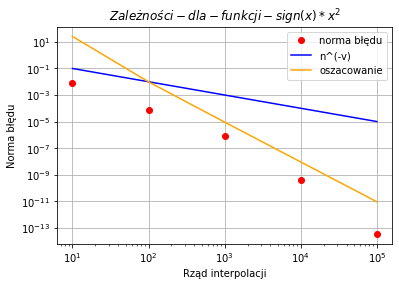

In [48]:
#Wykres dla funkcji f2, różniczkowalnej 1-krotnie
V = 2.102 * 10**4
X1 = np.linspace(-1+1e-5,1-1e-5,1000)
lst2 = [10, 100, 1000, 10**4, 10**5]
norma_bledu = []
n_minusv = []
oszacowanie = []

for n in lst2:
    x_i1 = main.chebyshev_nodes(n)
    y_i1 = f2(x_i1)
    w_i1 = main.bar_czeb_weights(n)

    Y1 = main.barycentric_inte(x_i1, y_i1, w_i1, X1)
    
    norma_bledu.append(main.L_inf(f2(X1), Y1))
    n_minusv.append(n**(-1)) # v = 1, maksymalny rząd pochodnej funkcji
    oszacowanie.append(4*V/3/np.pi/(n-3)**3)
    
plt.plot(lst2, norma_bledu, 'ro', label = 'norma błędu')
plt.plot(lst2, n_minusv, color = 'blue', label = 'n^(-v)')
plt.plot(lst2, oszacowanie, color = 'orange', label = 'oszacowanie')
plt.xscale('log'), plt.yscale('log')
plt.xlabel('Rząd interpolacji'), plt.ylabel('Norma błędu')
plt.title('$Zależności-dla-funkcji-sign(x)*x^2$')
plt.grid()
plt.legend()
plt.show()

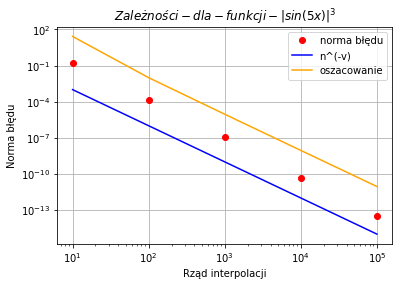

In [46]:
#Wykres dla funkcji f3, różniczkowalnej 3-krotnie
V = 2.102 * 10**4
X1 = np.linspace(-1+1e-5,1-1e-5,1000)
lst2 = [10, 100, 1000, 10**4, 10**5]
norma_bledu = []
n_minusv = []
oszacowanie = []

for n in lst2:
    x_i1 = main.chebyshev_nodes(n)
    y_i1 = f3(x_i1)
    w_i1 = main.bar_czeb_weights(n)

    Y1 = main.barycentric_inte(x_i1, y_i1, w_i1, X1)
    
    norma_bledu.append(main.L_inf(f3(X1), Y1))
    n_minusv.append(n**(-3)) # v = 3, maksymalną rząd pochodnej funkcji 
    oszacowanie.append(4*V/3/np.pi/(n-3)**3)
    
plt.plot(lst2, norma_bledu, 'ro', label = 'norma błędu')
plt.plot(lst2, n_minusv, color = 'blue', label = 'n^(-v)')
plt.plot(lst2, oszacowanie, color = 'orange', label = 'oszacowanie')
plt.xscale('log'), plt.yscale('log')
plt.xlabel('Rząd interpolacji'), plt.ylabel('Norma błędu')
plt.title('$Zależności-dla-funkcji-|sin(5x)|^3$')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#Możemy zauważyć, że oszacowanie w obu przypadkach na skali podwójnie-logarytmicznej jest prostą o nachyleniu mniejwięcej -3. 
#Jest to zgodne z teorią z wykładu.

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

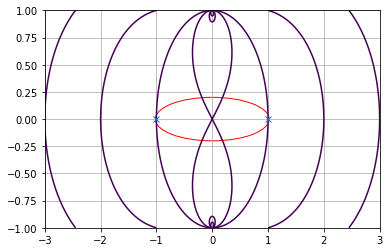

In [92]:
#Tworzenie elipsy f4_1
x = np.linspace(-3,3,2000)
y = np.linspace(-1,1,2000)
X, Y = np.meshgrid(x, y)
Z = f4(X + 1j * Y)
elipsa_f4=plt.figure()
ax=plt.gca()
ax.contour(X,Y,Z,[0.05,0.1,0.2,0.5,1,5,10,100,1000])
b=0.2-1e-6
c=1
a=np.sqrt(1+b**2)

ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='r', fc='None')
ax.add_patch(ellipse)
ax.grid()
ax.plot([-1,1],[0,0],'x')

rho=a+b
M=f4(1j*b)

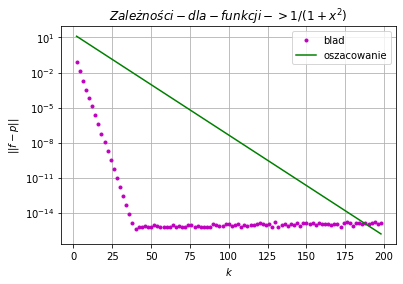

In [15]:
X2 = np.linspace(-1+1e-5,1-1e-5,100)
lst3 = [k for k in range(2, 200, 2)]
norma_bledu = []
wynik = []

Y_org = f4(X2)

for n in lst3:
    x_i2 = main.chebyshev_nodes(n)
    y_i2 = f4(x_i2)
    w_i2 = main.bar_czeb_weights(n)

    Y2 = main.barycentric_inte(x_i2, y_i2, w_i2, X2)
    
    norma_bledu.append(main.L_inf(f4(X2), Y2))
    
    wynik.append(np.abs(np.max((Y2 - Y_org))))
    
oszacowanie=[4*np.real(M)*rho**(-x)/(rho-1) for x in lst3]
plt.plot(lst3, wynik, 'm.', label = 'blad')
plt.plot(lst3, oszacowanie, color = 'green', label = 'oszacowanie')
plt.yscale('log')
plt.title('$Zależności-dla-funkcji->   1/(1+x^2)$')
plt.xlabel('$k$'), plt.ylabel('$||f-p||$')
plt.legend()
plt.grid()
plt.show()

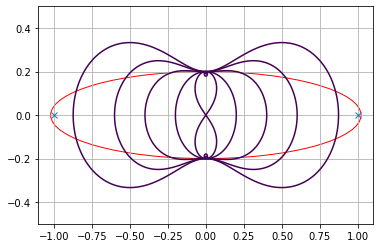

In [81]:
#Tworzenie elipsy f4_1
x = np.linspace(-1.1, 1.1,2000)
y = np.linspace(-0.5, 0.5,2000)
X, Y = np.meshgrid(x, y)
Z = f4_2(X + 1j * Y)
elipsa_f4_2=plt.figure()
ax=plt.gca()
ax.contour(X,Y,Z,[0.05,0.1,0.2,0.5,1,5,10,100,1000])
b=0.2-1e-5
c=1
a=np.sqrt(1+b**2)

ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='r', fc='None')
ax.add_patch(ellipse)
ax.grid()
ax.plot([-1,1],[0,0],'x')

rho=a+b
M1=f4_2(1j*b)

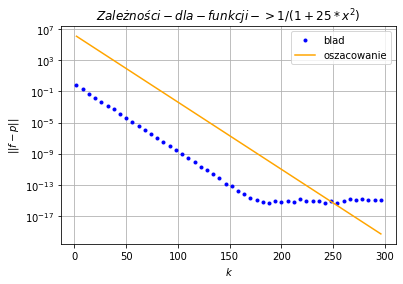

In [11]:
X2 = np.linspace(-1+1e-5,1-1e-5,100)
lst3 = [k for k in range(2, 300, 6)]
norma_bledu = []
wynik = []

Y_org = f4_2(X2)
M1=f4_2(1j*b)

for n in lst3:
    x_i2 = main.chebyshev_nodes(n)
    y_i2 = f4_2(x_i2)
    w_i2 = main.bar_czeb_weights(n)

    Y2 = main.barycentric_inte(x_i2, y_i2, w_i2, X2)
    
    norma_bledu.append(main.L_inf(f4_2(X2), Y2))
    wynik.append(np.abs(np.max((Y2 - Y_org))))
    
oszacowanie=[4*np.real(M1)*rho**(-x)/(rho-1) for x in lst3]
plt.plot(lst3, wynik, 'b.', label = 'blad')
plt.plot(lst3, oszacowanie, color = 'orange', label = 'oszacowanie')
plt.yscale('log')
plt.title('$Zależności-dla-funkcji->   1/(1+25*x^2)$')
plt.xlabel('$k$'), plt.ylabel('$||f-p||$')
plt.legend()
plt.grid()
plt.show()

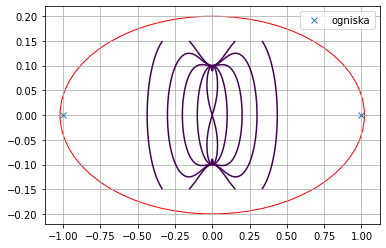

In [10]:
from matplotlib.patches import Ellipse
#Tworzenie elipsy f4_1
x = np.linspace(-1, 1,2000)
y = np.linspace(-0.15, 0.15,2000)
X, Y = np.meshgrid(x, y)
Z = f4_3(X + 1j * Y)
elipsa_f4_3=plt.figure()
ax=plt.gca()
ax.contour(X,Y,Z,[0.05,0.1,0.2,0.5,1,5,10,100,1000])
b=0.2-1e-5
c=1
a=np.sqrt(1+b**2)

ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='r', fc='None')
ax.add_patch(ellipse)
ax.grid()
ax.plot([-1,1],[0,0],'x', label = 'ogniska')
ax.legend()

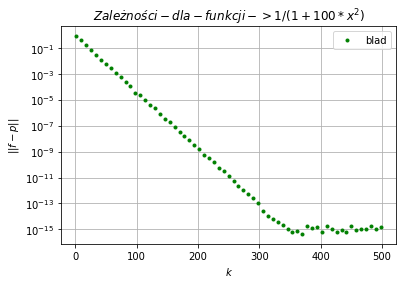

In [6]:
X2 = np.linspace(-1+1e-5,1-1e-5,100)
lst3 = [k for k in range(2, 500, 8)]
norma_bledu = []
wynik = []

Y_org = f4_3(X2)

for n in lst3:
    x_i2 = main.chebyshev_nodes(n)
    y_i2 = f4_3(x_i2)
    w_i2 = main.bar_czeb_weights(n)

    Y2 = main.barycentric_inte(x_i2, y_i2, w_i2, X2)
    
    norma_bledu.append(main.L_inf(f4_3(X2), Y2))
    wynik.append(np.abs(np.max((Y2 - Y_org))))
    
plt.plot(lst3, wynik, 'g.', label = 'blad')
plt.yscale('log')
plt.title('$Zależności-dla-funkcji->   1/(1+100*x^2)$')
plt.xlabel('$k$'), plt.ylabel('$||f-p||$')
plt.legend()
plt.grid()
plt.show()

***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

C:\Users\kocha\main.py:66: RuntimeWarning: divide by zero encountered in true_divide
  L = wi/(x - xi)
C:\Users\kocha\main.py:67: RuntimeWarning: invalid value encountered in double_scalars
  Y.append(yi@L/sum(L))
C:\Users\kocha\main.py:66: RuntimeWarning: divide by zero encountered in true_divide
  L = wi/(x - xi)
C:\Users\kocha\main.py:67: RuntimeWarning: invalid value encountered in double_scalars
  Y.append(yi@L/sum(L))
C:\Users\kocha\main.py:66: RuntimeWarning: divide by zero encountered in true_divide
  L = wi/(x - xi)
C:\Users\kocha\main.py:67: RuntimeWarning: invalid value encountered in double_scalars
  Y.append(yi@L/sum(L))
C:\Users\kocha\main.py:66: RuntimeWarning: divide by zero encountered in true_divide
  L = wi/(x - xi)
C:\Users\kocha\main.py:67: RuntimeWarning: invalid value encountered in double_scalars
  Y.append(yi@L/sum(L))


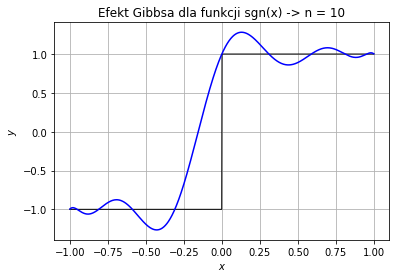

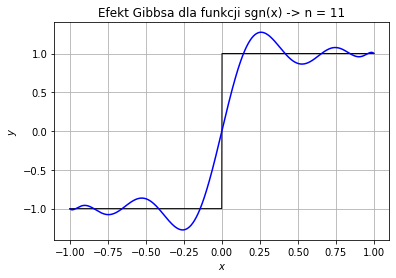

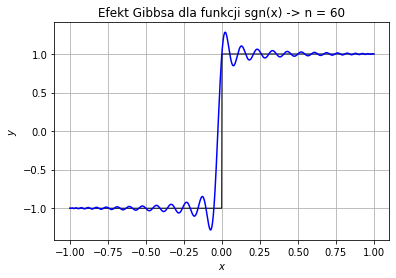

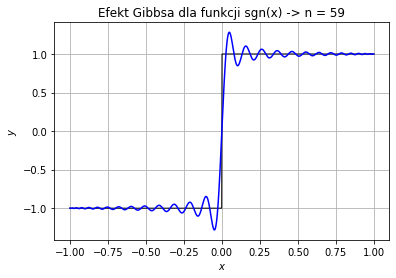

In [20]:
#dla n-parzystych
x = np.linspace(-1, 1, 1000)
y = f5(x)
lst=[10, 11, 60, 59]
for i in lst:
    w_czebyszew = main.bar_czeb_weights(i)
    x_czebyszew = main.chebyshev_nodes(i)
    y_czebyszew = f5(x_czebyszew)
    y_gibbs = main.barycentric_inte(x_czebyszew, y_czebyszew, w_czebyszew, x)
    plt.figure()
    plt.plot(x, y, linewidth=1, color="k")
    plt.title(f'Efekt Gibbsa dla funkcji sgn(x) -> n = {i}')
    plt.xlabel('$x$'),  plt.ylabel('$y$')
    plt.plot(x, y_gibbs, color = 'blue')
    plt.grid()
    

In [ ]:
#Możemy zauważyć, że dla n parzystych wielomian w sposób mniej dokładny przybliża nieciągłą funkcję. 

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)